In [26]:
from datetime import datetime
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [27]:
es_ip = "http://127.0.0.1:9200"
es =Elasticsearch(es_ip)

In [28]:
res = es.get(index="winlogbeat", id="Qc39130BMs_nTerjYsas")
print(res['_source'])

{'@timestamp': '2021-12-20T13:17:25.259Z', 'winlog': {'channel': 'Microsoft-Windows-Sysmon/Operational', 'provider_name': 'Microsoft-Windows-Sysmon', 'api': 'wineventlog', 'user': {'domain': 'NT AUTHORITY', 'name': 'SYSTEM', 'type': 'User', 'identifier': 'S-1-5-18'}, 'event_data': {'UtcTime': '2021-12-20 13:17:25.258', 'Product': 'RivetAPS', 'OriginalFileName': 'RAPS.exe', 'Hashes': 'MD5=F70A23758DA94B90A01CC791ACC7F385,SHA256=EEBCC0C6FD9A7BF70BA3028DAEA19C450FCC698169C2E5B03F6BEF9D4BBA1A6F,IMPHASH=935B686812E8D4246E2278AF50AA30FB', 'LogonGuid': '{1f725ed7-4242-61bc-0f2a-a16b00000000}', 'ProcessGuid': '{1f725ed7-8265-61c0-010f-e48100000000}', 'TerminalSessionId': '2', 'ProcessId': '59868', 'ParentImage': 'C:\\Program Files\\Rivet Networks\\SmartByte\\RAPS.exe', 'CommandLine': 'RAPS.exe -u', 'Description': 'RivetAPS', 'User': 'DESKTOP-T3V8EOP\\a3789', 'RuleName': '-', 'FileVersion': '3.1.995.0', 'ParentProcessGuid': '{1f725ed7-296e-61ab-8f00-000000000d00}', 'CurrentDirectory': 'C:\\Prog

In [29]:
query_str = {"size": 0,"aggregations": {"result": {"terms": {"field": "winlog.computer_name.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]

C:\Users\LOUIS_~1\AppData\Local\Temp/ipykernel_8932/292756096.py:2: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  res = es.search(index="winlogbeat", body=query_str)


Text(0.5, 1.0, 'Computer Logs')

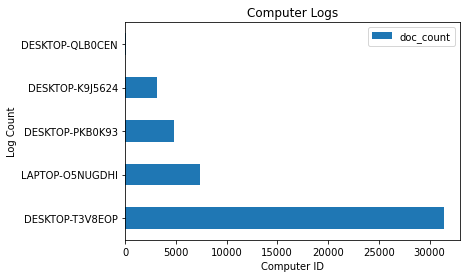

In [30]:

computer_pd = pd.DataFrame(result, columns=["key", "doc_count"])
computer_pd.plot(x="key", y="doc_count", kind="barh");
plt.xlabel('Computer ID')
plt.ylabel('Log Count')
plt.title('Computer Logs')

In [31]:
res = es.get(index="winlogbeat", id="Qc39130BMs_nTerjYsas")
print(res['_source'])

{'@timestamp': '2021-12-20T13:17:25.259Z', 'winlog': {'channel': 'Microsoft-Windows-Sysmon/Operational', 'provider_name': 'Microsoft-Windows-Sysmon', 'api': 'wineventlog', 'user': {'domain': 'NT AUTHORITY', 'name': 'SYSTEM', 'type': 'User', 'identifier': 'S-1-5-18'}, 'event_data': {'UtcTime': '2021-12-20 13:17:25.258', 'Product': 'RivetAPS', 'OriginalFileName': 'RAPS.exe', 'Hashes': 'MD5=F70A23758DA94B90A01CC791ACC7F385,SHA256=EEBCC0C6FD9A7BF70BA3028DAEA19C450FCC698169C2E5B03F6BEF9D4BBA1A6F,IMPHASH=935B686812E8D4246E2278AF50AA30FB', 'LogonGuid': '{1f725ed7-4242-61bc-0f2a-a16b00000000}', 'ProcessGuid': '{1f725ed7-8265-61c0-010f-e48100000000}', 'TerminalSessionId': '2', 'ProcessId': '59868', 'ParentImage': 'C:\\Program Files\\Rivet Networks\\SmartByte\\RAPS.exe', 'CommandLine': 'RAPS.exe -u', 'Description': 'RivetAPS', 'User': 'DESKTOP-T3V8EOP\\a3789', 'RuleName': '-', 'FileVersion': '3.1.995.0', 'ParentProcessGuid': '{1f725ed7-296e-61ab-8f00-000000000d00}', 'CurrentDirectory': 'C:\\Prog

In [32]:
query_str = {"size": 0,"aggregations": {"result": {"terms": {"field": "winlog.computer_name.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]

C:\Users\LOUIS_~1\AppData\Local\Temp/ipykernel_8932/292756096.py:2: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  res = es.search(index="winlogbeat", body=query_str)


Text(0.5, 1.0, 'Event Logs')

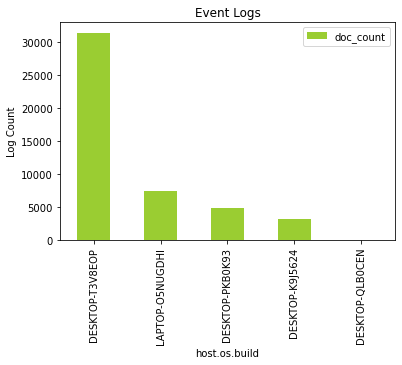

In [33]:
event_pd = pd.DataFrame(result,columns=["key","doc_count"])
event_pd.plot(x="key",y="doc_count",kind="barh",color="yellowgreen")
plt.xlabel("host.os.build")
plt.ylabel("Log Count")
plt.title('Event Logs')